In [22]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
# Load the dataset
df = pd.read_csv("emails.csv")

In [24]:
# Drop duplicates and handle missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [25]:
# Download NLTK stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ArjunSkymax\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
# Function to process text data
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [27]:
# Tokenize the text data
df['clean_text'] = df['text'].apply(process)

In [28]:
# Convert text data into feature matrix
cv = CountVectorizer(analyzer=process)
message = cv.fit_transform(df['text'])

In [29]:
# Split the data into training, validation, and testing sets
x_train_val, x_test, y_train_val, y_test = train_test_split(message, df['spam'], test_size=0.20, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

In [30]:
# Create and train the Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [31]:
# Generate predictions
train_pred = classifier.predict(x_train)
val_pred = classifier.predict(x_val)
test_pred = classifier.predict(x_test)

In [32]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, train_pred)
val_accuracy = accuracy_score(y_val, val_pred)
test_accuracy = accuracy_score(y_test, test_pred)

In [33]:
# Print classification reports
print("Training Set Classification Report:")
print(classification_report(y_train, train_pred))

print("Validation Set Classification Report:")
print(classification_report(y_val, val_pred))

print("Testing Set Classification Report:")
print(classification_report(y_test, test_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       0.99      1.00      0.99       817

    accuracy                           1.00      3417
   macro avg       0.99      1.00      1.00      3417
weighted avg       1.00      1.00      1.00      3417

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       857
           1       0.98      0.98      0.98       282

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.98      1139
weighted avg       0.99      0.99      0.99      1139

Testing Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      0.99      0.98       269

    accuracy                           0.99      1139
   macro avg       

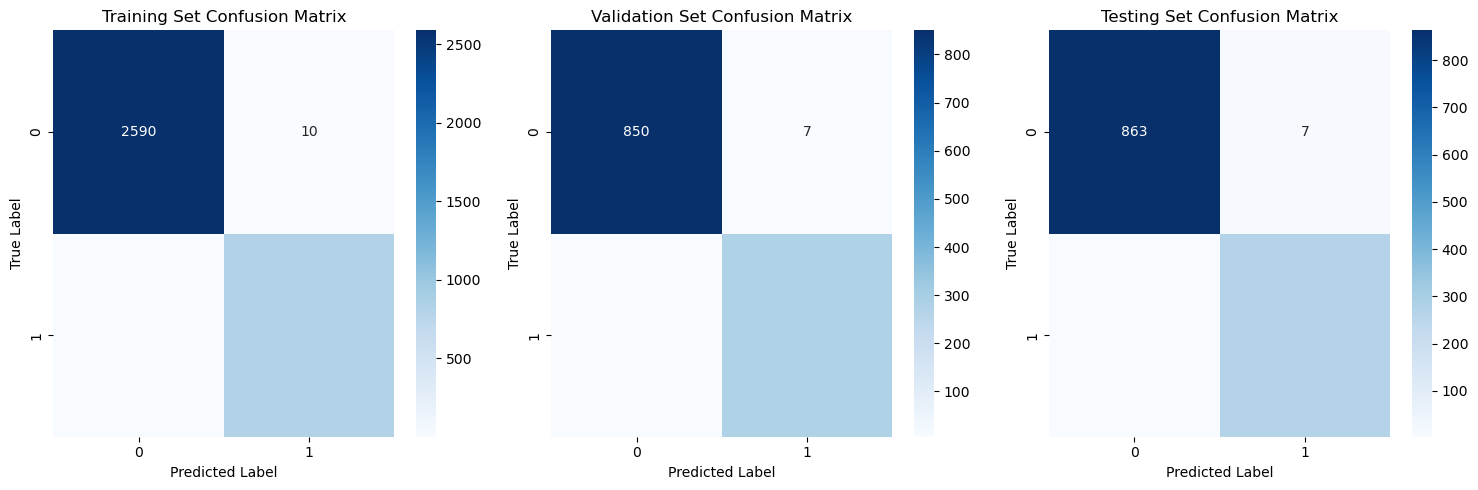

In [34]:
# Print confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(confusion_matrix(y_train, train_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Set Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(confusion_matrix(y_val, val_pred), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Validation Set Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Testing Set Confusion Matrix')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [35]:
# Print accuracies
print("Training Set Accuracy:", train_accuracy)
print("Validation Set Accuracy:", val_accuracy)
print("Testing Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.996780801872988
Validation Set Accuracy: 0.9885864793678666
Testing Set Accuracy: 0.9912203687445127


C:\Users\ArjunSkymax\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ArjunSkymax\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


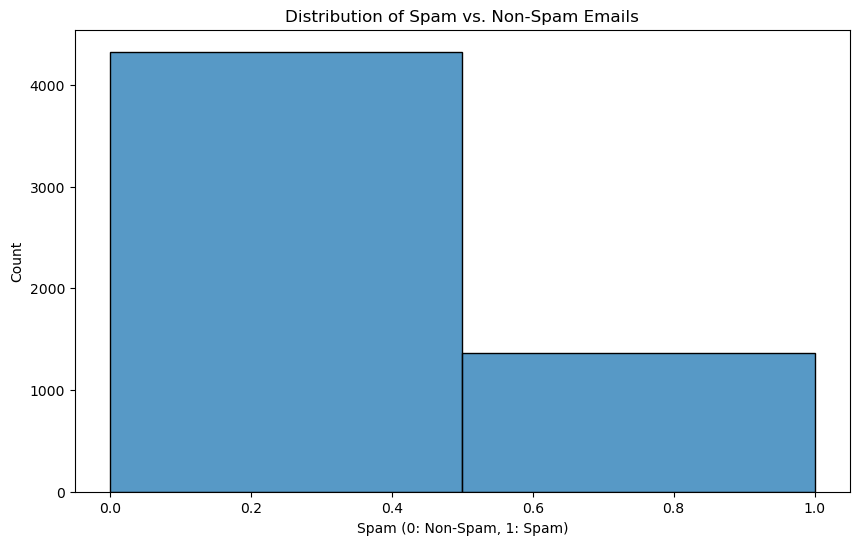

In [36]:
# Generate histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='spam', kde=False, bins=2)
plt.title('Distribution of Spam vs. Non-Spam Emails')
plt.xlabel('Spam (0: Non-Spam, 1: Spam)')
plt.ylabel('Count')
plt.show()